In [1]:
from google.colab import drive
from google.colab import widgets
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# There is where you want to upload the dataset
%cd '/content/drive/MyDrive/CV/Semantic Segmentation/deStamp'

/content/drive/MyDrive/CV/Semantic Segmentation/deStamp


In [3]:
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import skimage
from skimage.transform import *
from skimage.color import *
from skimage.filters import threshold_mean
import cv2
import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing.image import *
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [4]:
SCANS_DIR = "archive/scans/scans/"
TRUTH_DIR = "archive/ground-truth-pixel/ground-truth-pixel/"
IMG_SIZE=(2302,1632, 3)
scan_files = glob.glob(SCANS_DIR+'*.png')
scan_files = sorted(scan_files)
# scan_files = list(filter(lambda x:"(" not in x, scan_files))
scan_files_train = scan_files[:400]
scan_files_test = scan_files[400:]
truth_files = glob.glob(TRUTH_DIR+'*.png')
truth_files = sorted(truth_files)
# truth_files = list(filter(lambda x:"(" not in x, truth_files))

In [5]:
scan_files_train_selected = scan_files_train[363:400]
truth_files_selected = truth_files[363:400]
pd.DataFrame({'scan':scan_files_train_selected, 'truth':truth_files_selected})

,scan,truth
0,archive/scans/scans/stampDS-00364.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00364-px.png
1,archive/scans/scans/stampDS-00365.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00365-px.png
2,archive/scans/scans/stampDS-00366.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00366-px.png
3,archive/scans/scans/stampDS-00367.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00367-px.png
4,archive/scans/scans/stampDS-00368.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00368-px.png
5,archive/scans/scans/stampDS-00369.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00369-px.png
6,archive/scans/scans/stampDS-00370.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00370-px.png
7,archive/scans/scans/stampDS-00371.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00371-px.png
8,archive/scans/scans/stampDS-00372.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00372-px.png
9,archive/scans/scans/stampDS-00373.png,archive/ground-truth-pixel/ground-truth-pixel/stampDS-00373-px.png


In [6]:
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(imread(scan_files_train_selected[i]))
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(imread(scan_files_test[i]))

In [ ]:
y = 1-imread(truth_files_selected[0])[:,:,0].flatten()//255
y_pred = np.zeros(y.shape)

print('accuracy_score=', accuracy_score(y,y_pred))
print('log_loss=', log_loss(y,y_pred))

accuracy_score= 0.9995630431218232
log_loss= 0.015091955909565932


Counter({0: 3521321, 1: 138079})
Counter({0: 3521321, 1: 136480, 2: 1599})
CLASS_WEIGHTS[bg,text,stamp]= [1.03921227e+00 2.68127198e+01 4.57711069e+03]


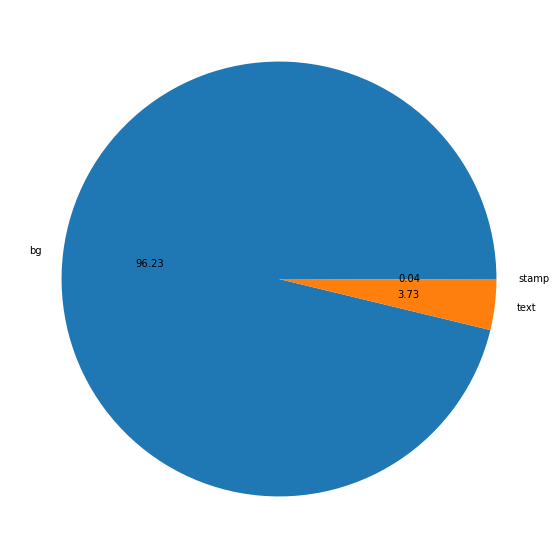

In [ ]:
from collections import Counter
def calc_sample_weight(label, image):
    image = rgb2gray(image)
    around_texts = cv2.dilate((image < 0.5).astype(np.uint8) | label, np.ones((2,2)))
    print(Counter(around_texts.reshape(-1)))
    combined = around_texts + label
    print(Counter(combined.reshape(-1)))
    class_counts = np.unique(combined, return_counts=True)[1]
    class_weight = np.sum(class_counts)/class_counts * np.array([1,1,2])[:len(class_counts)]
    #class_weight = class_weight / np.max(class_weight)
    weights = np.vectorize(lambda x: class_weight[x])(combined).flatten()
    return weights,class_counts,class_weight

y = 1-imread(truth_files_selected[0])[:,:,0].astype(np.uint8)//255
x = imread(scan_files_train_selected[0])
weights,class_counts,class_weight = calc_sample_weight(y, x)
plt.figure(figsize=(10,10))
plt.pie(class_counts, labels=['bg','text','stamp'], autopct='%.2f')
print('CLASS_WEIGHTS[bg,text,stamp]=',class_weight)

In [ ]:
def image_generator(files, randomized=True,labels=None, include_weights=False,batch_size=1, augment=False, gamma_range=(1,1), jitter_range=0):
    img_batch = []
    label_batch = []
    weight_batch = []
    while True:
        indices = range(len(files))
        if randomized:
            indices = np.random.randint(len(files), size=len(files))
        for i in indices:
            if len(img_batch) >= batch_size:
                img_batch = []
                label_batch = []
                weight_batch = []
            img = imread(files[i])
            img = img / 255
            img = cv2.copyMakeBorder(img,
                                     (IMG_SIZE[0]-img.shape[0])//2,
                                     (IMG_SIZE[0]-img.shape[0])-(IMG_SIZE[0]-img.shape[0])//2,
                                     (IMG_SIZE[1]-img.shape[1])//2,
                                     (IMG_SIZE[1]-img.shape[1])-(IMG_SIZE[1]-img.shape[1])//2,
                                     cv2.BORDER_REFLECT)
            label = None
            if labels is not None:
                label = imread(labels[i])
                label = (255-label) / 255
                label = label[:,:,0].astype(np.uint8)
                label = cv2.copyMakeBorder(label,
                                         (IMG_SIZE[0]-label.shape[0])//2,
                                         (IMG_SIZE[0]-label.shape[0])-(IMG_SIZE[0]-label.shape[0])//2,
                                         (IMG_SIZE[1]-label.shape[1])//2,
                                         (IMG_SIZE[1]-label.shape[1])-(IMG_SIZE[1]-label.shape[1])//2,
                                         cv2.BORDER_REFLECT)
            if augment:
                gamma = np.random.uniform(gamma_range[0], gamma_range[1])
                img = img**np.random.uniform(gamma_range[0], gamma_range[1])
                
                jitter = np.random.uniform(0, jitter_range, (4,2)).astype(np.float32)
                pts1 = np.array(((0,0),(IMG_SIZE[1],0),(0,IMG_SIZE[0]),(IMG_SIZE[1],IMG_SIZE[0]))).astype(np.float32)
                pts2 = pts1 + jitter
                M = cv2.getPerspectiveTransform(pts1,pts2)
                img = cv2.warpPerspective(img,M,(IMG_SIZE[1],IMG_SIZE[0]),borderValue=(1,1,1))
                if labels is not None:
                    label = cv2.warpPerspective(label,M,(IMG_SIZE[1],IMG_SIZE[0]),flags=cv2.INTER_NEAREST, borderValue=0)

            img_batch.append(img)
            if labels is not None:
                if include_weights:
                    weight_batch.append(calc_sample_weight(label,img)[0])
                label_batch.append(label.reshape((IMG_SIZE[1]*IMG_SIZE[0],1)))
            if len(img_batch) >= batch_size:
                if labels is not None:
                    if include_weights:
                        yield np.array(img_batch), np.array(label_batch), np.array(weight_batch)
                    else:
                        yield np.array(img_batch), np.array(label_batch)
                else:
                    yield np.array(img_batch)

Counter({0: 3637202, 1: 119662})
Counter({0: 3637202, 1: 110444, 2: 9218})


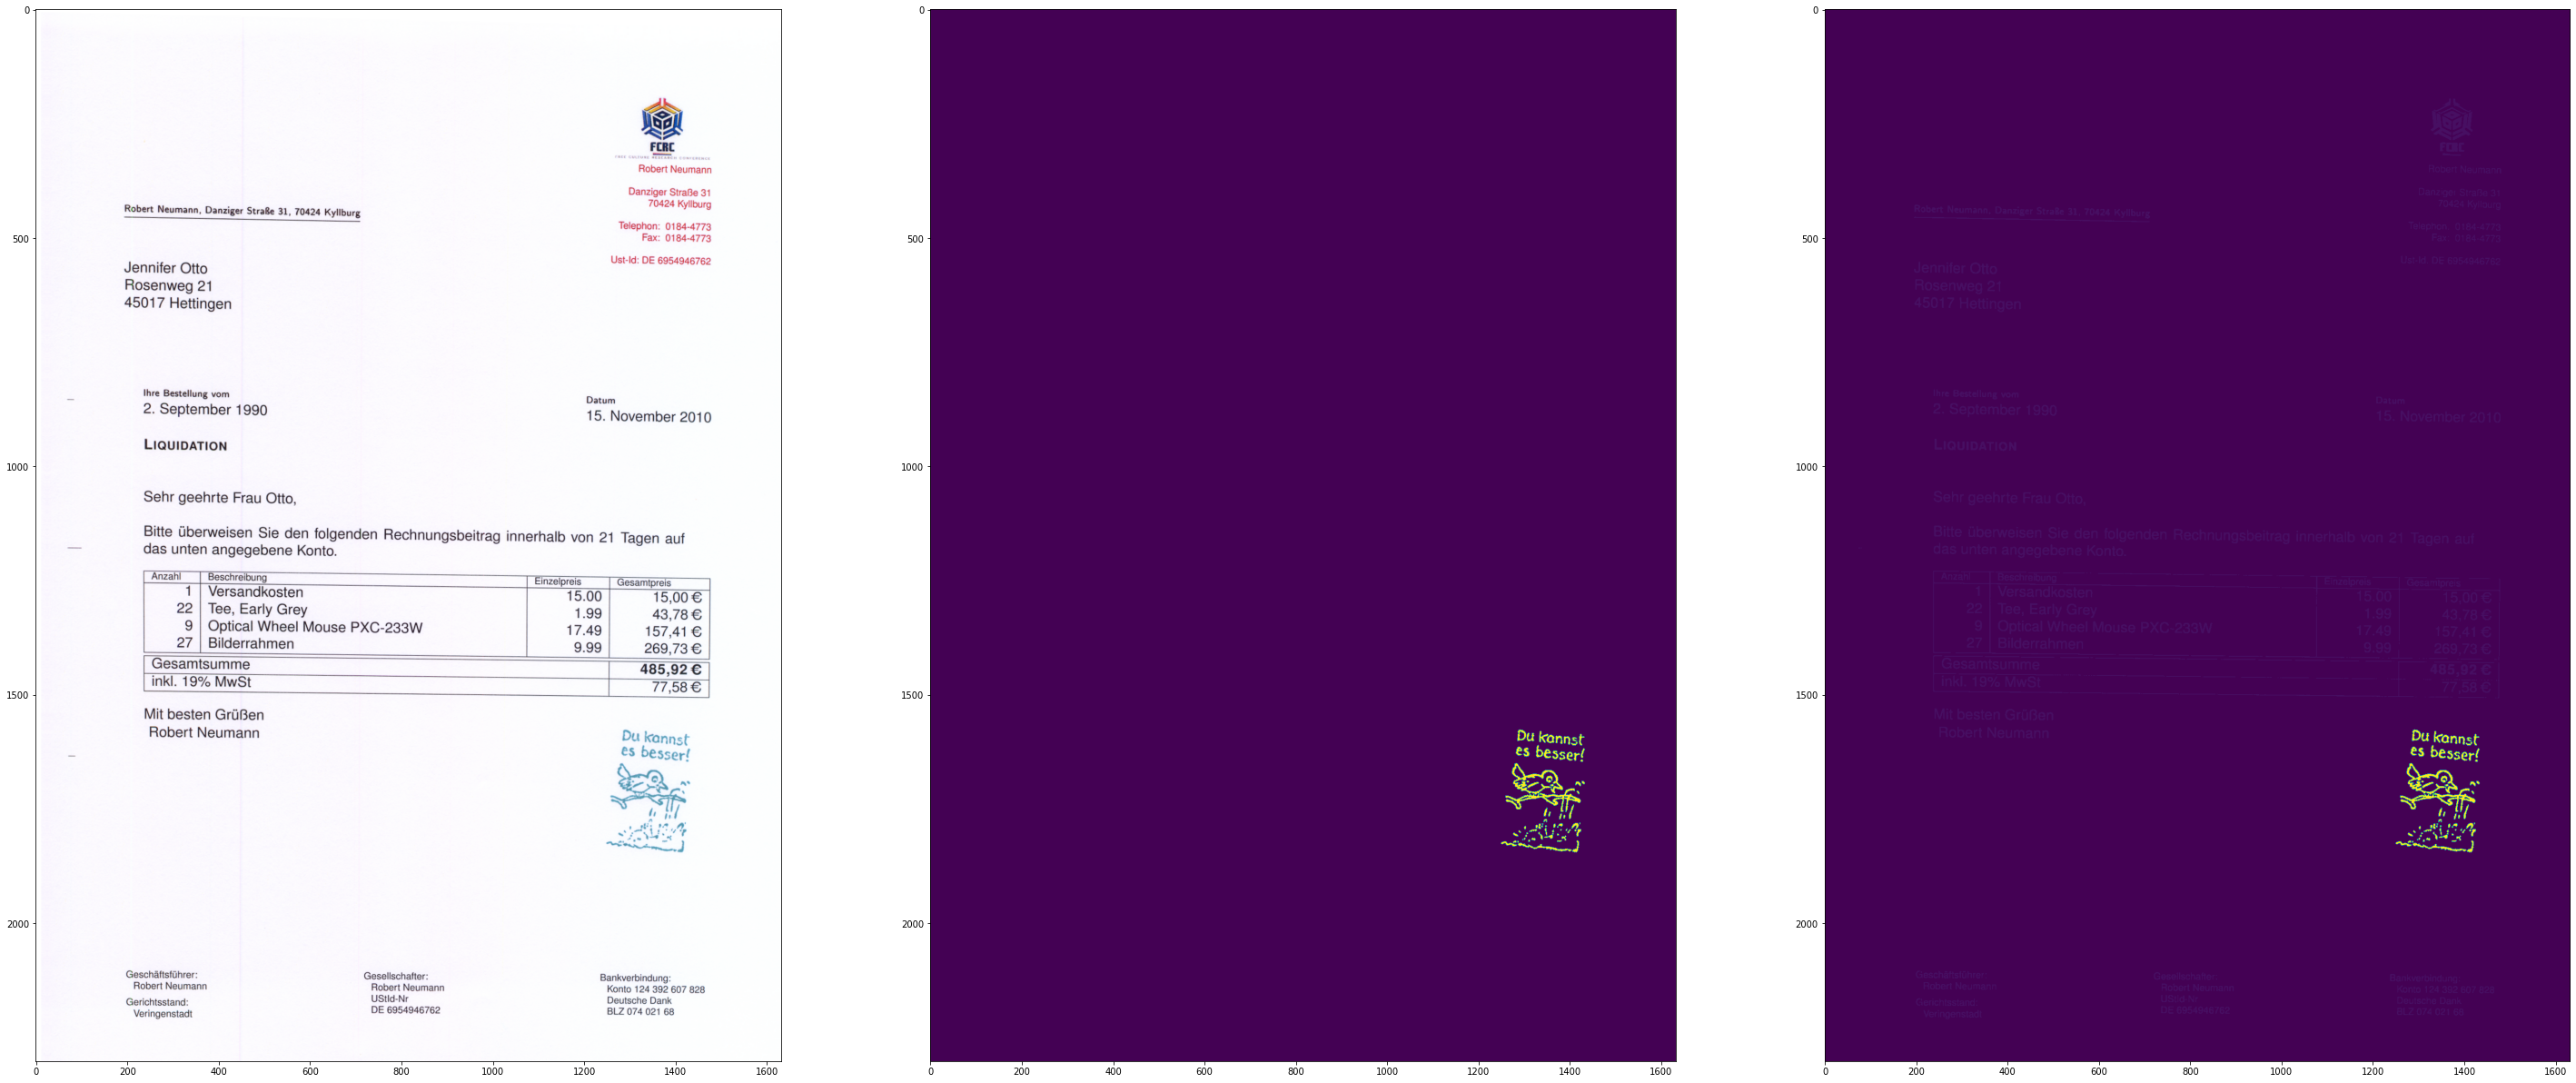

In [ ]:
scans, labels, weights = next(image_generator(scan_files_train_selected, labels=truth_files_selected, include_weights=True, batch_size=1, augment=True, gamma_range=(0.8,0.8), jitter_range=50))

plt.figure(figsize=(50,50))
plt.subplot(1,3,1)
plt.imshow(scans[0]);
plt.subplot(1,3,2)
plt.imshow(labels[0].reshape((IMG_SIZE[0],IMG_SIZE[1])));
plt.subplot(1,3,3)
plt.imshow(weights[0].reshape((IMG_SIZE[0],IMG_SIZE[1])));

In [ ]:
Counter(weights[0])

Counter({1.0328994650283376: 3637202,
         34.016008112708704: 110444,
         815.1147754393578: 9218})

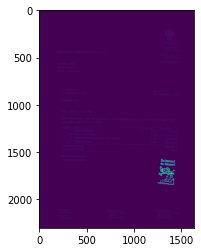

In [ ]:
plt.imshow(weights.reshape((IMG_SIZE[0],IMG_SIZE[1])))

In [ ]:
def make_model():
    inp = Input(IMG_SIZE)
    x = ZeroPadding2D(((1,1),(16,16)))(inp)
    skips=[]
    for n in [9,12,12]:
        skips.append(x)
        x = Conv2D(n, kernel_size=3,strides=2,activation='relu',padding='same')(x)
        x = BatchNormalization()(x)
    for n in [9,12]:
        x = UpSampling2D(size=2)(x)
        x = concatenate([x, skips.pop()])
        x = Conv2DTranspose(n, kernel_size=3,strides=1,activation='relu',padding='same')(x)
        x = BatchNormalization()(x)
    x = UpSampling2D(size=2)(x)
    x = concatenate([x, skips.pop()])
    x = Conv2DTranspose(1, kernel_size=3,strides=1,activation='sigmoid',padding='same')(x)
    x = Cropping2D(((1,1),(16,16)))(x)
    x = Reshape((IMG_SIZE[0]*IMG_SIZE[1],1,))(x)
    return Model(inp, x)

In [ ]:
model = make_model()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'], sample_weight_mode="temporal")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2302, 1632,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 2304, 1664,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 1152, 832, 9  252         ['zero_padding2d[0][0]']         
                                )                                                             

In [ ]:
!rm *.hdf5

batch_size=1
epochs=90
checkpoint_period=30
model.fit_generator(image_generator(scan_files_train_selected, labels=truth_files_selected, include_weights=True, batch_size=1, augment=True, gamma_range=(0.8,1.25), jitter_range=50),
                    steps_per_epoch=len(scan_files_train_selected)//batch_size,
                    validation_data=image_generator(scan_files_train_selected, labels=truth_files_selected, include_weights=True, batch_size=1, augment=True, gamma_range=(0.8,1.25), jitter_range=50),
                    validation_steps=3,
                    max_queue_size=1,
                    epochs=epochs,
                    callbacks=[ModelCheckpoint('./stamp.weights.{epoch:04d}.hdf5', period=checkpoint_period, save_weights_only=True)],
                    verbose=1)

rm: cannot remove '*.hdf5': No such file or directory


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/90
37/37 [==============================] - 99s 2s/step - loss: 2.2095 - acc: 0.7034 - val_loss: 3.0306 - val_acc: 0.9992
Epoch 2/90
37/37 [==============================] - 89s 2s/step - loss: 1.0065 - acc: 0.8993 - val_loss: 3.2924 - val_acc: 0.9963
Epoch 3/90
37/37 [==============================] - 88s 2s/step - loss: 0.6409 - acc: 0.9638 - val_loss: 2.7746 - val_acc: 0.9987
Epoch 4/90
37/37 [==============================] - 87s 2s/step - loss: 0.4987 - acc: 0.9779 - val_loss: 3.1292 - val_acc: 0.9985
Epoch 5/90
37/37 [==============================] - 86s 2s/step - loss: 0.5800 - acc: 0.9797 - val_loss: 3.7168 - val_acc: 0.9978
Epoch 6/90
37/37 [==============================] - 86s 2s/step - loss: 0.4759 - acc: 0.9876 - val_loss: 2.4537 - val_acc: 0.9948
Epoch 7/90
37/37 [==============================] - 87s 2s/step - loss: 0.3897 - acc: 0.9909 - val_loss: 1.9609 - val_acc: 0.6963
Epoch 8/90
37/37 [==============================] - 87s 2s/step - loss: 0.3437 - acc: 0.99

In [ ]:
steps=len(scan_files_test)
checkpoints = sorted(glob.glob('*.hdf5'))
rows = len(checkpoints)+1

plt.figure(figsize=(steps*10, rows*10))
for i in range(steps):
    plt.subplot(rows,steps,i+1)
    plt.imshow(imread(scan_files_test[i]))
for i, c in enumerate(checkpoints):
    model.load_weights(c)
    predicted = model.predict_generator(image_generator(scan_files_test,randomized=False, labels=None, include_weights=False, batch_size=1, augment=False),
                       steps=steps)
    predicted = np.round(predicted).reshape((steps,IMG_SIZE[0],IMG_SIZE[1]))
    for s in range(steps):
        plt.subplot(rows,steps,i*steps+s+steps+1)
        plt.imshow(predicted[s])

Output hidden; open in https://colab.research.google.com to view.

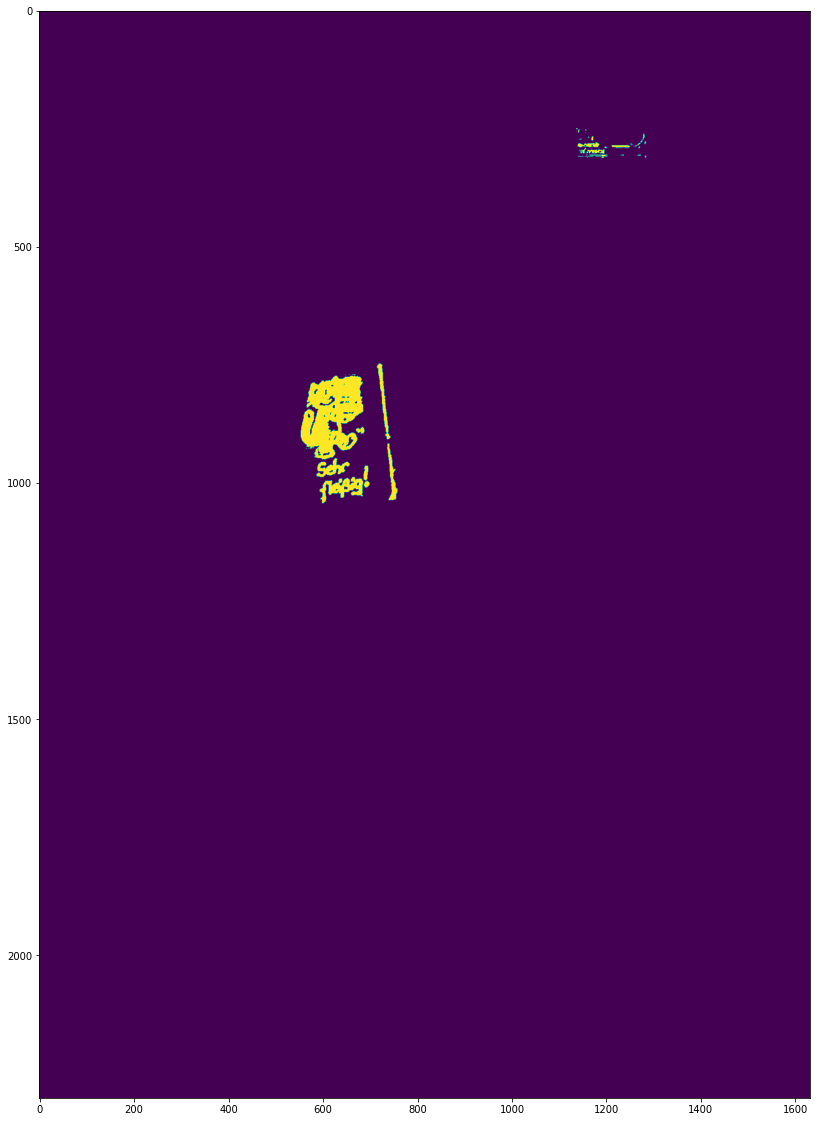

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(predicted[1])